In [2]:
import os, shutil
original_dataset_dir = "cats vs dogs/train"
dirs = []
base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)
train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)
train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)
for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)
for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small\train : 2
cats_vs_dogs_small\validation : 2
cats_vs_dogs_small\test : 2
cats_vs_dogs_small\train\cats : 1000
cats_vs_dogs_small\train\dogs : 1000
cats_vs_dogs_small\validation\cats : 500
cats_vs_dogs_small\validation\dogs : 500
cats_vs_dogs_small\test\cats : 500
cats_vs_dogs_small\test\dogs : 500
Done.


In [3]:
from keras.preprocessing import image

datagen = image.ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [6]:
import os
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#print(fnames[0:10])

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
print(x.shape)
x= x.reshape((1,) + x.shape)
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


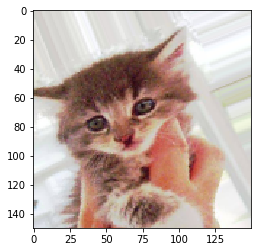

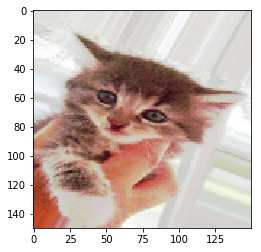

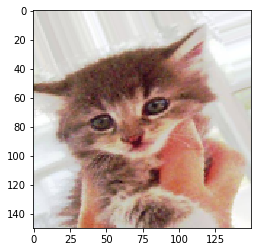

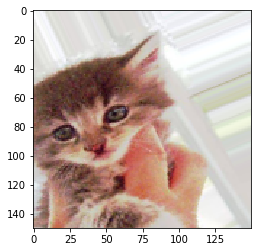

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        plt.show()